In [139]:
import numpy as nb 
import pandas as pd
import spacy , nltk , re 
from nltk.corpus import stopwords 
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import  train_test_split 
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB 
from sklearn.metrics import accuracy_score , f1_score , precision_score

In [80]:
nlp = spacy.load('en_core_web_sm')

In [81]:
df = pd.read_csv(r'D:\Artifitial intelligenc\NLP\Datasets\spam.csv' , encoding='latin1')

In [82]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [83]:
df = df[['v2','v1']]
df.rename(columns={'v2':'Text','v1': 'Label'} , inplace=True)
df

,Text,Label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [84]:
df.Label = df.Label.map({
    'ham':1 , 
    'spam':0
})

In [85]:
df

,Text,Label
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0
5568,Will Ì_ b going to esplanade fr home?,1
5569,"Pity, * was in mood for that. So...any other s...",1
5570,The guy did some bitching but I acted like i'd...,1


In [86]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

403
0


In [87]:
def num_words (sent):
    words = nltk.word_tokenize(sent) 
    return len(words)

In [88]:
df['num_words'] = df['Text'].apply(lambda x : num_words(x))

In [89]:
df

,Text,Label,num_words
0,"Go until jurong point, crazy.. Available only ...",1,24
1,Ok lar... Joking wif u oni...,1,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,37
3,U dun say so early hor... U c already then say...,1,13
4,"Nah I don't think he goes to usf, he lives aro...",1,15
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0,35
5568,Will Ì_ b going to esplanade fr home?,1,9
5569,"Pity, * was in mood for that. So...any other s...",1,15
5570,The guy did some bitching but I acted like i'd...,1,27


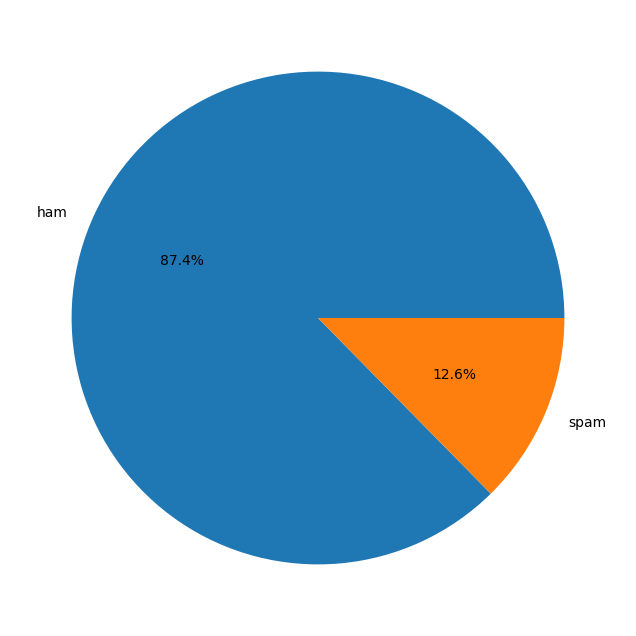

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(df.Label.value_counts() , autopct='%.1f%%' ,labels=['ham','spam'])
plt.show()


In [99]:
def preproc (text) :
    text = text.lower()
    text = re.sub(r'^[a-zA-Z]' , "" , text )
    text =  nlp(text)
    text = [word for word in text if not word.is_punct and not word.is_stop]
    text = [word.lemma_ for word in text]
    return " ".join(text)

In [100]:
df['cleaned_text'] = df.Text.apply(lambda x : preproc(x))

In [101]:
tf = TfidfVectorizer()

In [104]:
cleaned_text = tf.fit_transform(df['cleaned_text']).toarray()

In [107]:
cleaned_text.shape

(5169, 7882)

In [108]:
x = cleaned_text
y = df.Label

In [109]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,random_state=42 , test_size=0.2)

In [140]:
models = {
    'MultinomialNB : ' : MultinomialNB() ,
    'GaussianNB : ' : GaussianNB() , 
    'BernoulliNB : ' : BernoulliNB()
}

In [141]:
acc=[]
f1=[]
percision=[]

for modelName , model in  (models.items()) : 
    print(modelName , '\n' , model.fit(xtrain, ytrain))
    print(f"Model {modelName} is training....")
    ypred = model.predict(xtest)
    acc.append(accuracy_score(ypred , ytest))
    f1.append(f1_score(ypred , ytest))
    percision.append(precision_score(ypred , ytest))
    print("\n\n")

MultinomialNB :  
 MultinomialNB()
Model MultinomialNB :  is training....



GaussianNB :  
 GaussianNB()
Model GaussianNB :  is training....



BernoulliNB :  
 BernoulliNB()
Model BernoulliNB :  is training....





In [142]:
scores  = pd.DataFrame({
    "accuracy_score" : acc , 
    "f1_score" : f1 , 
    "precision_score" : percision
})

In [165]:
scores.index = [name.split()[0] for name in models.keys()]

<Axes: >

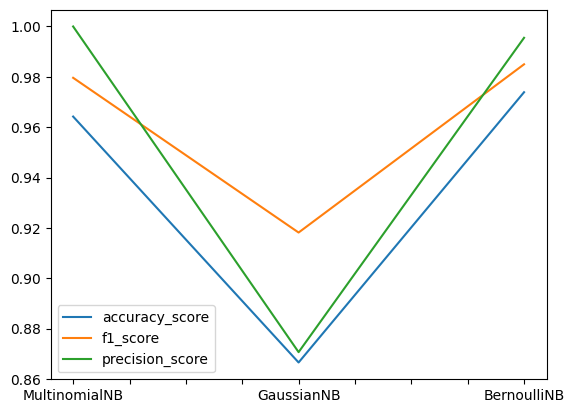

In [167]:
scores.plot(kind='line')